In [119]:
from concurrent.futures import ThreadPoolExecutor
import sqlite3
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.geometry import LineString


In [120]:
def read_fleet_from_db(query):
    dat = {}
    conn = sqlite3.connect(fleet_dbFile)
    c = conn.cursor()
    c.execute(query)
    rows = c.fetchall()   
    print("Length of rows: ", len(rows)) 
    for row in rows:
        ID = row[0]
        response = row[1]
        input = row[2]
        output_90 = row[3]
        output_100 = row[4]
        output_dist = row[5]

        inIDS = pickle.loads(input)
        odist = pickle.loads(output_dist)
        inXML = pickle.loads(input)

        tmpDat = [ID, response, inIDS, output_90, output_100, odist]

        d = tmpDat
        scen = {}
            
        #try:
        #    root = d[2].getroot()
        #except:
        #    print('error')
        #    root = []
        #    continue
        scenID = d[0]
        #print(root.tag)
        #for child in root:    
        #    ### find the segment ID
        #    segmentID = child.find('ID').text
        #    speed = float(child.find('Freeflow_Speed').text)
        #    lanes = float(child.find('Number_of_Lanes').text)
        #    blocked = False
        #    if segmentID in link_ids:
        #        scen[segmentID] = speed
        saveDat = [inIDS, d[3]]  
        dat[ID] = saveDat#.append([ID, response, inXML, output_90, output_100, odist])

    conn.close()
    return dat

def read_ladris_from_db(query):
    dat = {}
    conn = sqlite3.connect(ladris_dbFile)
    c = conn.cursor()
    c.execute(query)
    rows = c.fetchall()    
    for row in rows:
        ID = row[0]
        response = row[1]
        input = row[2]
        output_90 = row[3]
        output_100 = row[4]
        output_dist = row[5]

        inIDS = pickle.loads(input)
        odist = pickle.loads(output_dist)
        inXML = pickle.loads(input)

        tmpDat = [ID, response, inXML, output_90, output_100, odist]

        d = tmpDat
        scen = {}

        scenID = d[0]
        #print(root.tag)
        #for child in d[2]:    
        #    ### find the segment ID
        #    segmentID = child['osmid']
        #    speed = float(child['speed_mph'])
        #    lanes = float(child['num_lanes'])
        #    blocked = child['is_blocked']
        #    if blocked == True:
        #        scen[segmentID] = 1
        #    #if segmentID in link_ids:
        #        #scen[segmentID] = blocked
        saveDat = [inIDS, d[3]]  
        dat[ID] = saveDat#.append([ID, response, inXML, output_90, output_100, odist])

    conn.close()
    return dat

In [121]:
ladris_dbFile = '/home/pfoytik/rtepm/EMA/lhc_samples/ladris_scenarios_conv2.db'
fleet_dbFile = '/home/pfoytik/rtepm/EMA/lhc_samples/fleet_scenarios_conv2.db'

In [122]:
queries = [
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000 offset 2000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000 offset 4000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000 offset 6000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 1000 offset 8000',    
]

ladris_comb_scenarios = {}
with ThreadPoolExecutor(max_workers=6) as executor:
    for result in executor.map(read_ladris_from_db, queries):
        ladris_comb_scenarios.update(result)

print(len(ladris_comb_scenarios))

fleet_comb_scenarios = {}
with ThreadPoolExecutor(max_workers=6) as executor:
    for result in executor.map(read_fleet_from_db, queries):
        fleet_comb_scenarios.update(result)

print(len(fleet_comb_scenarios))        


2000
Length of rows:  0
Length of rows:  0
Length of rows:  0
Length of rows:  0
Length of rows:  2000
2000


In [123]:
ladris_comb_scenarios.keys()

dict_keys([500501, 500500, 500000, 499501, 499003, 498506, 498010, 497515, 497021, 496528, 496036, 495545, 495055, 494566, 494078, 493591, 493105, 492620, 492136, 491653, 491171, 490690, 490210, 489731, 489253, 488776, 488300, 487825, 487351, 486878, 486406, 485935, 485465, 484996, 484528, 484061, 483595, 483130, 482666, 482203, 481741, 481280, 480820, 480361, 479903, 479446, 478990, 478535, 478081, 477628, 477176, 476725, 476275, 475826, 475378, 474931, 474485, 474040, 473596, 473153, 472711, 472270, 471830, 471391, 470953, 470516, 470080, 469645, 469211, 468778, 468346, 467915, 467485, 467056, 466628, 466201, 465775, 465350, 464926, 464503, 464081, 463660, 463240, 462821, 462403, 461986, 461570, 461155, 460741, 460328, 459916, 459505, 459095, 458686, 458278, 457871, 457465, 457060, 456656, 456253, 455851, 455450, 455050, 454651, 454253, 453856, 453460, 453065, 452671, 452278, 451886, 451495, 451105, 450716, 450328, 449941, 449555, 449170, 448786, 448403, 448021, 447640, 447260, 44688

In [124]:
fleet_comb_scenarios.keys()

dict_keys([500501, 500500, 500000, 499501, 499003, 498506, 498010, 497515, 497021, 496528, 496036, 495545, 495055, 494566, 494078, 493591, 493105, 492620, 492136, 491653, 491171, 490690, 490210, 489731, 489253, 488776, 488300, 487825, 487351, 486878, 486406, 485935, 485465, 484996, 484528, 484061, 483595, 483130, 482666, 482203, 481741, 481280, 480820, 480361, 479903, 479446, 478990, 478535, 478081, 477628, 477176, 476725, 476275, 475826, 475378, 474931, 474485, 474040, 473596, 473153, 472711, 472270, 471830, 471391, 470953, 470516, 470080, 469645, 469211, 468778, 468346, 467915, 467485, 467056, 466628, 466201, 465775, 465350, 464926, 464503, 464081, 463660, 463240, 462821, 462403, 461986, 461570, 461155, 460741, 460328, 459916, 459505, 459095, 458686, 458278, 457871, 457465, 457060, 456656, 456253, 455851, 455450, 455050, 454651, 454253, 453856, 453460, 453065, 452671, 452278, 451886, 451495, 451105, 450716, 450328, 449941, 449555, 449170, 448786, 448403, 448021, 447640, 447260, 44688

In [125]:
ladris_df_results = pd.DataFrame([x[1] for x in ladris_comb_scenarios.values()])
fleet_df_results = pd.DataFrame([x[1] for x in fleet_comb_scenarios.values()])

ladris_dataDict = {}
fleet_dataDict = {}
for k in ladris_comb_scenarios.keys():
    for link in ladris_comb_scenarios[k][0]:        
        if link in ladris_dataDict.keys():
            pass
        else:
            #if link in link_ids:
            ladris_dataDict[link] = []   

for k in ladris_comb_scenarios.keys():
    for i in ladris_dataDict.keys():
        if i in ladris_comb_scenarios[k][0]:
            #if link in link_ids:
            ladris_dataDict[i].append(1)
        else:
            #if link in link_ids:
            ladris_dataDict[i].append(0) 

ladris_df = pd.DataFrame(ladris_dataDict)

for k in fleet_comb_scenarios.keys():
    for link in fleet_comb_scenarios[k][0]:        
        if link in fleet_dataDict.keys():
            pass
        else:
            #if link in link_ids:
            fleet_dataDict[link] = []   

for k in fleet_comb_scenarios.keys():
    for i in fleet_dataDict.keys():
        if i in fleet_comb_scenarios[k][0]:
            #if link in link_ids:
            fleet_dataDict[i].append(1)
        else:
            #if link in link_ids:
            fleet_dataDict[i].append(0) 

fleet_df = pd.DataFrame(fleet_dataDict)

# Process and compare inputs

In [126]:
print("Fleet segments:", len(fleet_df.columns))
print("Ladris segments:", len(ladris_df.columns))

ladris_df.head()

Fleet segments: 10
Ladris segments: 28


,330221,334722,329174,344238,328156,336153,341386,342952,329091,329644,...,332329,338651,334250,335451,342669,341295,329502,341121,333480,343388
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,0,1,0,1,...,1,1,1,1,1,0,0,0,0,0
2,0,0,1,1,1,1,1,0,0,1,...,1,0,1,1,1,1,1,1,1,1
3,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,0,1,1,1,0,1
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,1,0,1,1,0,1


In [127]:
ladris_df.iloc[0]

330221    1
334722    1
329174    1
344238    1
328156    1
336153    1
341386    1
342952    1
329091    1
329644    1
332253    1
331775    1
330184    1
329821    1
335197    1
334420    0
330512    0
335525    0
332329    0
338651    0
334250    0
335451    0
342669    0
341295    0
329502    0
341121    0
333480    0
343388    0
Name: 0, dtype: int64

In [128]:
### count how many times columns 10116970483 10116945306 and 10091170129 are all 1 in ladris
count = 0
for i in range(len(ladris_df)):
    if ladris_df.iloc[i][330221] == 1 and ladris_df.iloc[i][329644] == 1 and ladris_df.iloc[i][341295] == 1:
        print("Found all 1s at index:", i)
        count += 1
print("Total count:", count)



Found all 1s at index: 3
Found all 1s at index: 15
Found all 1s at index: 16
Found all 1s at index: 20
Found all 1s at index: 32
Found all 1s at index: 33
Found all 1s at index: 37
Found all 1s at index: 39
Found all 1s at index: 52
Found all 1s at index: 61
Found all 1s at index: 62
Found all 1s at index: 64
Found all 1s at index: 66
Found all 1s at index: 86
Found all 1s at index: 89
Found all 1s at index: 106
Found all 1s at index: 107
Found all 1s at index: 112
Found all 1s at index: 131
Found all 1s at index: 134
Found all 1s at index: 145
Found all 1s at index: 172
Found all 1s at index: 173
Found all 1s at index: 177
Found all 1s at index: 180
Found all 1s at index: 181
Found all 1s at index: 183
Found all 1s at index: 192
Found all 1s at index: 196
Found all 1s at index: 197
Found all 1s at index: 207
Found all 1s at index: 212
Found all 1s at index: 215
Found all 1s at index: 221
Found all 1s at index: 225
Found all 1s at index: 234
Found all 1s at index: 243
Found all 1s at i

In [129]:
### get a new dataframe of ladris_df where columns 330221 329644 and 341295 are all 1
ladris_df_subset = ladris_df[(ladris_df[330221] == 1) & (ladris_df[329644] == 1) & (ladris_df[341295] == 1)]
ladris_df_subset.head()


,330221,334722,329174,344238,328156,336153,341386,342952,329091,329644,...,332329,338651,334250,335451,342669,341295,329502,341121,333480,343388
3,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,0,1,1,1,0,1
15,1,1,1,0,1,1,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
16,1,0,1,1,0,0,0,1,0,1,...,0,0,1,1,1,1,1,1,0,1
20,1,1,0,0,0,1,0,0,1,1,...,1,1,0,0,0,1,0,0,0,1
32,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1


In [130]:
### print a list of the index values from ladris_df_subset
sub_indexs = ladris_df_subset.index.values

### print the ladris_df_results for the sub_indexs
ladris_df_results_subset = ladris_df_results.iloc[sub_indexs]
ladris_df_results_subset.head()

,0
3,4.652006
15,5.243494
16,5.682941
20,5.245733
32,5.239470


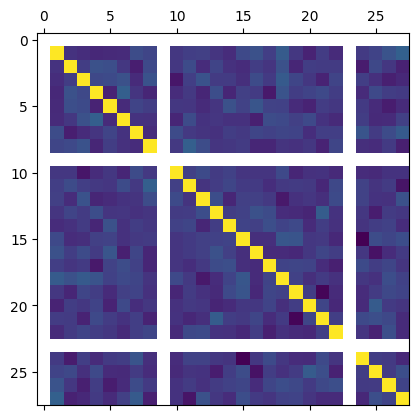

In [131]:
### plot a correlation matrix of the ladris_df_subset
corr = ladris_df_subset.corr()
plt.matshow(corr)
plt.show()


In [132]:
fleet_ids = list(fleet_df.columns)
ladris_ids = list(ladris_df.columns)

### Get Ladris Roads


In [133]:
ladris_segment_data = {}
roadFile = '../lhc_samples/data/ladris/C27F9DE4CE6780696685FB4A4E31E242_orig'
with open(roadFile, 'r') as f:
    ladris_segment_data = json.load(f)

ladris_latlong_dict = {}
ladris_potential_dict = {}
modified_dict = {}
ladris_names = {}

for i in ladris_segment_data:
    #print(i)
    ladris_latlong_dict[i['AC91D0B60F78BEFB85DE39CD9C3D2623']] = i['geometry']
    lanes = i['num_lanes']
    speed = i['speed_mph']
    ladris_names[i['AC91D0B60F78BEFB85DE39CD9C3D2623']] = i['name']
    ladris_potential_dict[i['AC91D0B60F78BEFB85DE39CD9C3D2623']] = lanes * speed

In [134]:
### count how many ladris_ids are in ladris_latlong_dict.keys
ladris_count = 0
for i in ladris_ids:
    if i in ladris_latlong_dict.keys():
        ladris_count += 1
    else:
        pass

print("Ladris segments in ladris_latlong_dict:", ladris_count)



Ladris segments in ladris_latlong_dict: 28


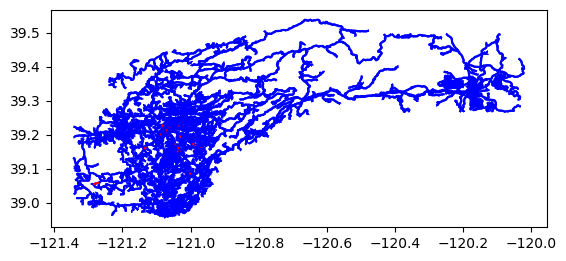

In [135]:
#### ladris_latlong_dict
new_ladris_latlong_dict = {}
for i in ladris_latlong_dict:    
    if i in ladris_ids:                
        #print(LineString(ladris_latlong_dict[i]))        
        new_ladris_latlong_dict[i] = LineString(ladris_latlong_dict[i])            
    ladris_latlong_dict[i] = LineString(ladris_latlong_dict[i])



all_gdf = GeoDataFrame(geometry=[ladris_latlong_dict[i] for i in ladris_latlong_dict])
sub_gdf = GeoDataFrame(geometry=[new_ladris_latlong_dict[i] for i in new_ladris_latlong_dict])


### plot all_gdf and sub_gdf on same plot
fig, ax = plt.subplots()
all_gdf.plot(ax=ax, color='blue')
sub_gdf.plot(ax=ax, color='red')

plt.show()

In [136]:
### export sub_gdf to kml
sub_gdf.to_file("ladris_sub_gdf.kml", driver="KML")

/home/pfoytik/anaconda3/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


### Get Fleet Roads

In [137]:
### read segment id's from ../lhc_samples/data/fleet/segments.xml
tree = ET.parse('../lhc_samples/data/fleet/segments.xml')
root = tree.getroot()

fleet_segment_dict = {}
fleet_potential_dict = {}
for child in root:
    fleet_segment_dict[child.find('ID').text] = child.find('Link_ID').text
    lanes = int(child.find('Number_of_Lanes').text)
    speed = int(child.find('Freeflow_Speed').text)
    fleet_potential_dict[child.find('ID').text] = lanes * speed

### read ../lhcsamples/data/fleet/links.xml
tree = ET.parse('../lhc_samples/data/fleet/links.xml')
root = tree.getroot()

fleet_link_dict = {}
fleet_name_dict = {}
for child in root:
    fleet_link_dict[child.find('ID').text] = [child.find('ANode').text, child.find('BNode').text]    
    fleet_name_dict[child.find('ID').text] = child.find('Name').text

### read ../lhcsamples/data/fleet/nodes.xml and get lat long for BNode of each fleet_link_dict
tree = ET.parse('../lhc_samples/data/fleet/nodes.xml')
root = tree.getroot()

fleet_node_dict = {}
for child in root:
    fleet_node_dict[child.find('ID').text] = [child.find('Latitude').text, child.find('Longitude').text]

fleet_lat_long_dict = {}
### for each segment in fleet_segment_dict, get the link_id, from fleet_link_dict get the BNode, from fleet_node_dict get the lat long
for segment in fleet_segment_dict:
    link_id = fleet_segment_dict[segment]
    anode = fleet_link_dict[link_id][0]
    bnode = fleet_link_dict[link_id][1]
    lat_long = [fleet_node_dict[anode], fleet_node_dict[bnode]]
    fleet_lat_long_dict[int(segment)] = [[float(lat_long[0][1]), float(lat_long[0][0])],[float(lat_long[1][1]), float(lat_long[1][0])]]

In [138]:
### find value in fleet_lat_long_dict that is less than 39.05
bad_segments = []
for i in fleet_lat_long_dict:
    if fleet_lat_long_dict[i][0][1] < 39.1 or fleet_lat_long_dict[i][1][1] < 39.1:        
        print(i, fleet_lat_long_dict[i])
        ### remove from dictionary
        bad_segments.append(i)

for i in bad_segments:
    ### remove from fleet_lat_long_dict
    fleet_lat_long_dict.pop(i)

91170214 [[-121.06024, 39.0], [-121.05987, 39.2001]]
10091170214 [[-121.05987, 39.2001], [-121.06024, 39.0]]
116951100 [[-121.05605, 39.195], [-121.06024, 39.0]]
10116951100 [[-121.06024, 39.0], [-121.05605, 39.195]]
985378445 [[-121.06252, 39.1995], [-121.06024, 39.0]]
10985378445 [[-121.06024, 39.0], [-121.06252, 39.1995]]
985378446 [[-121.06024, 39.0], [-121.06085, 39.2007]]
10985378446 [[-121.06085, 39.2007], [-121.06024, 39.0]]


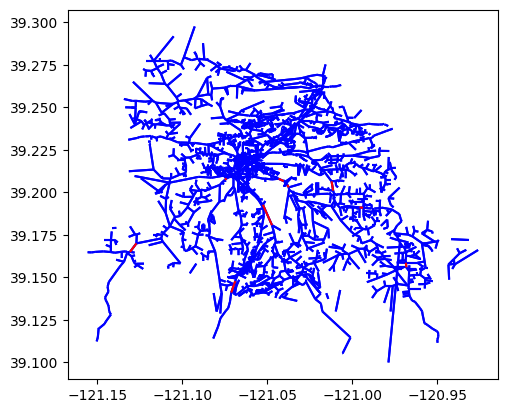

In [139]:
### for each fleet_lat_long_dict convert to float
new_fleet_lat_long_dict = {}
for i in fleet_lat_long_dict:
    if str(i) in fleet_ids:
        new_fleet_lat_long_dict[i] = LineString(fleet_lat_long_dict[i])
    fleet_lat_long_dict[i] = LineString(fleet_lat_long_dict[i])

all_gdf = GeoDataFrame(geometry=[fleet_lat_long_dict[i] for i in fleet_lat_long_dict])
sub_gdf = GeoDataFrame(geometry=[new_fleet_lat_long_dict[i] for i in new_fleet_lat_long_dict])

### plot all_gdf and sub_gdf on same plot
fig, ax = plt.subplots()
all_gdf.plot(ax=ax, color='blue')
sub_gdf.plot(ax=ax, color='red')

plt.show()

![image](images/mainSegments_fleetBlue_LadrisPurple.png)

In [140]:
### export sub_gdf to kml
sub_gdf.to_file("fleet_sub_gdf.kml", driver="KML")

/home/pfoytik/anaconda3/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [141]:
### print the first row of fleet_df
print(fleet_df.iloc[0].values)

[1 1 1 0 0 0 0 0 0 0]


In [142]:
print(fleet_df.iloc[1].values)

[0 0 1 1 1 1 0 0 0 0]


# Process and compare results

In [143]:
### fleet_df_results is in seconds and we need to convert it to hours
fleet_df_results = fleet_df_results/3600
fleet_df_results


,0
0,2.666667
1,3.583333
2,3.583333
3,3.583333
4,2.666667
...,...
1995,2.666667
1996,2.666667
1997,2.666667
1998,3.666667


In [144]:
### remove rows of ladris_df_results that have a value of 0
ladris_df_results = ladris_df_results[ladris_df_results != 0]
ladris_df_results = ladris_df_results.dropna()
ladris_df_results

,0
0,5.249842
1,3.879646
2,3.844590
3,4.652006
4,3.765344
...,...
1995,4.119792
1996,4.583354
1997,5.270471
1998,3.792136


In [145]:
### print summary statistics for fleet_df_results
fleet_df_results.describe()


,0
count,2000.000000
mean,3.195292
std,0.803599
min,2.666667
25%,2.666667
50%,2.666667
75%,3.583333
max,5.500000


In [146]:
### print summary statistics of ladris_df_results
ladris_df_results.describe()

,0
count,2000.000000
mean,4.457039
std,1.041844
min,3.624039
25%,3.779961
50%,4.120497
75%,4.910395
max,9.736981


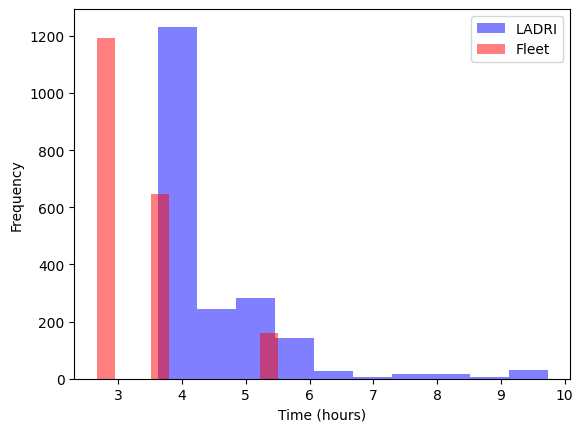

In [147]:
### plot histogram of fleet results and ladris results in the same figure
fig, ax = plt.subplots()
ladris_df_results.plot.hist(ax=ax, bins=10, alpha=0.5, color='blue')
fleet_df_results.plot.hist(ax=ax, bins=10, alpha=0.5, color='red')
### add a legend where the labels are 'LADRI' and 'Fleet'
plt.legend(['LADRI', 'Fleet'])
### add label to x axis 'Time (hours)'
plt.xlabel('Time (hours)')

plt.show()